In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data_LN
from model import model_summary
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('S8/util.py')
from util import test, train, plot_acc_loss
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [15]:
train_loader ,  test_loader  = load_data_LN()


Files already downloaded and verified
Files already downloaded and verified


In [16]:


class S8_Model_LN(nn.Module):
    def __init__(self):
        super(S8_Model_LN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=7, padding=3, bias=False),
            nn.LayerNorm([8, 28, 28]), 
            nn.ReLU(),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(8, 4, kernel_size=3, padding=1),
            nn.LayerNorm([4, 28, 28]), 
            nn.ReLU(),
        )

        self.conv1x1_3 = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=1),
            nn.LayerNorm([8, 28, 28]),  
            nn.ReLU(),
        )

        self.pool_1 = nn.MaxPool2d(2, 2)
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(8, 4, kernel_size=3, padding=1),
            nn.LayerNorm([4, 14, 14]),  # Adjust for post-pooling size
            nn.ReLU(),
        )

        self.conv5 = nn.Sequential(
            nn.Conv2d(4, 10, kernel_size=3, padding=1),
            nn.LayerNorm([10, 14, 14]),
            nn.ReLU(),
        )

        self.conv6 = nn.Sequential(
            nn.Conv2d(10, 8, kernel_size=3, padding=0),
            nn.LayerNorm([8, 12, 12]),
            nn.ReLU(),
        )

        self.conv1x1_7 = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size=1),
            nn.LayerNorm([8, 12, 12]),
            nn.ReLU(),
        )

        self.pool_2 = nn.MaxPool2d(2, 2)
        
        self.conv8 = nn.Sequential(
            nn.Conv2d(8, 10, kernel_size=3, padding=1),
            nn.LayerNorm([10, 6, 6]),
        )

        self.conv9 = nn.Sequential(
            nn.Conv2d(10, 16, kernel_size=3, padding=1),
            nn.LayerNorm([16, 6, 6]),
        )

        self.conv10 = nn.Sequential(
            nn.Conv2d(16, 4, kernel_size=1, padding=1),
            
        )

        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.conv1x1_11 = nn.Sequential(
            nn.Conv2d(4, 10, kernel_size=1),
            
        )

    

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv1x1_3(x)
        x = self.pool_1(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv1x1_7(x)
        x = self.pool_2(x)
        x = self.conv8(x)
        x = self.conv9(x)
        x = self.conv10(x)
        x = self.gap(x)
        x = self.conv1x1_11(x)
        x = x.view(x.size(0), -1)  
        x = F.log_softmax(x, dim=1)
        return x


In [17]:
model = S8_Model_LN().to(device)
model_summary(model,input_size= (3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]           1,176
         LayerNorm-2            [-1, 8, 28, 28]          12,544
              ReLU-3            [-1, 8, 28, 28]               0
            Conv2d-4            [-1, 4, 28, 28]             292
         LayerNorm-5            [-1, 4, 28, 28]           6,272
              ReLU-6            [-1, 4, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]              40
         LayerNorm-8            [-1, 8, 28, 28]          12,544
              ReLU-9            [-1, 8, 28, 28]               0
        MaxPool2d-10            [-1, 8, 14, 14]               0
           Conv2d-11            [-1, 4, 14, 14]             292
        LayerNorm-12            [-1, 4, 14, 14]           1,568
             ReLU-13            [-1, 4, 14, 14]               0
           Conv2d-14           [-1, 10,

In [18]:

optimizer_sgd = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,dampening=0,weight_decay=0,nesterov=False)
scheduler = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=5, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_sgd,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




Epoch 1


Train: Loss=1.6806 Batch_id=781 Accuracy=21.86: 100%|██████████| 782/782 [00:17<00:00, 45.81it/s] 


Test set: Average loss: 0.0283, Accuracy: 3113/10000 (31.13%)

Epoch 2


Train: Loss=1.6847 Batch_id=781 Accuracy=31.58: 100%|██████████| 782/782 [00:16<00:00, 48.40it/s] 


Test set: Average loss: 0.0267, Accuracy: 3416/10000 (34.16%)

Epoch 3


Train: Loss=1.5393 Batch_id=781 Accuracy=34.37: 100%|██████████| 782/782 [00:17<00:00, 44.25it/s]


Test set: Average loss: 0.0268, Accuracy: 3457/10000 (34.57%)

Epoch 4


Train: Loss=1.7936 Batch_id=781 Accuracy=36.26: 100%|██████████| 782/782 [00:17<00:00, 45.54it/s]


Test set: Average loss: 0.0259, Accuracy: 3594/10000 (35.94%)

Epoch 5


Train: Loss=1.7223 Batch_id=781 Accuracy=37.50: 100%|██████████| 782/782 [00:16<00:00, 46.39it/s] 


Test set: Average loss: 0.0256, Accuracy: 3689/10000 (36.89%)

Epoch 6


Train: Loss=2.0570 Batch_id=781 Accuracy=40.17: 100%|██████████| 782/782 [00:16<00:00, 46.39it/s] 


Test set: Average loss: 0.0244, Accuracy: 4033/10000 (40.33%)

Epoch 7


Train: Loss=1.5657 Batch_id=781 Accuracy=40.47: 100%|██████████| 782/782 [00:17<00:00, 45.38it/s]


Test set: Average loss: 0.0244, Accuracy: 4091/10000 (40.91%)

Epoch 8


Train: Loss=1.4413 Batch_id=781 Accuracy=40.74: 100%|██████████| 782/782 [00:16<00:00, 46.49it/s]


Test set: Average loss: 0.0243, Accuracy: 4108/10000 (41.08%)

Epoch 9


Train: Loss=1.3625 Batch_id=781 Accuracy=41.02: 100%|██████████| 782/782 [00:17<00:00, 45.94it/s]


Test set: Average loss: 0.0242, Accuracy: 4146/10000 (41.46%)

Epoch 10


Train: Loss=1.7028 Batch_id=781 Accuracy=41.06: 100%|██████████| 782/782 [00:16<00:00, 47.09it/s] 


Test set: Average loss: 0.0242, Accuracy: 4135/10000 (41.35%)

Epoch 11


Train: Loss=1.6014 Batch_id=781 Accuracy=41.67: 100%|██████████| 782/782 [00:17<00:00, 45.56it/s]


Test set: Average loss: 0.0240, Accuracy: 4187/10000 (41.87%)

Epoch 12


Train: Loss=1.8905 Batch_id=781 Accuracy=41.72: 100%|██████████| 782/782 [00:16<00:00, 46.46it/s]


Test set: Average loss: 0.0241, Accuracy: 4160/10000 (41.60%)

Epoch 13


Train: Loss=1.6042 Batch_id=781 Accuracy=41.74: 100%|██████████| 782/782 [00:16<00:00, 46.46it/s] 


Test set: Average loss: 0.0240, Accuracy: 4170/10000 (41.70%)

Epoch 14


Train: Loss=1.6907 Batch_id=781 Accuracy=41.80: 100%|██████████| 782/782 [00:16<00:00, 46.63it/s] 


Test set: Average loss: 0.0240, Accuracy: 4190/10000 (41.90%)

Epoch 15


Train: Loss=1.8584 Batch_id=781 Accuracy=41.70: 100%|██████████| 782/782 [00:17<00:00, 46.00it/s]


Test set: Average loss: 0.0240, Accuracy: 4187/10000 (41.87%)

Epoch 16


Train: Loss=1.5966 Batch_id=781 Accuracy=41.80: 100%|██████████| 782/782 [00:16<00:00, 46.33it/s] 


Test set: Average loss: 0.0240, Accuracy: 4192/10000 (41.92%)

Epoch 17


Train: Loss=1.4304 Batch_id=781 Accuracy=41.84: 100%|██████████| 782/782 [00:16<00:00, 46.41it/s] 


Test set: Average loss: 0.0240, Accuracy: 4195/10000 (41.95%)

Epoch 18


Train: Loss=1.1099 Batch_id=781 Accuracy=41.81: 100%|██████████| 782/782 [00:18<00:00, 42.58it/s]


Test set: Average loss: 0.0240, Accuracy: 4196/10000 (41.96%)

Epoch 19


Train: Loss=1.5126 Batch_id=781 Accuracy=41.84: 100%|██████████| 782/782 [00:16<00:00, 46.19it/s] 


Test set: Average loss: 0.0240, Accuracy: 4198/10000 (41.98%)

Epoch 20


Train: Loss=1.0573 Batch_id=781 Accuracy=41.82: 100%|██████████| 782/782 [00:15<00:00, 49.85it/s] 


Test set: Average loss: 0.0240, Accuracy: 4196/10000 (41.96%)



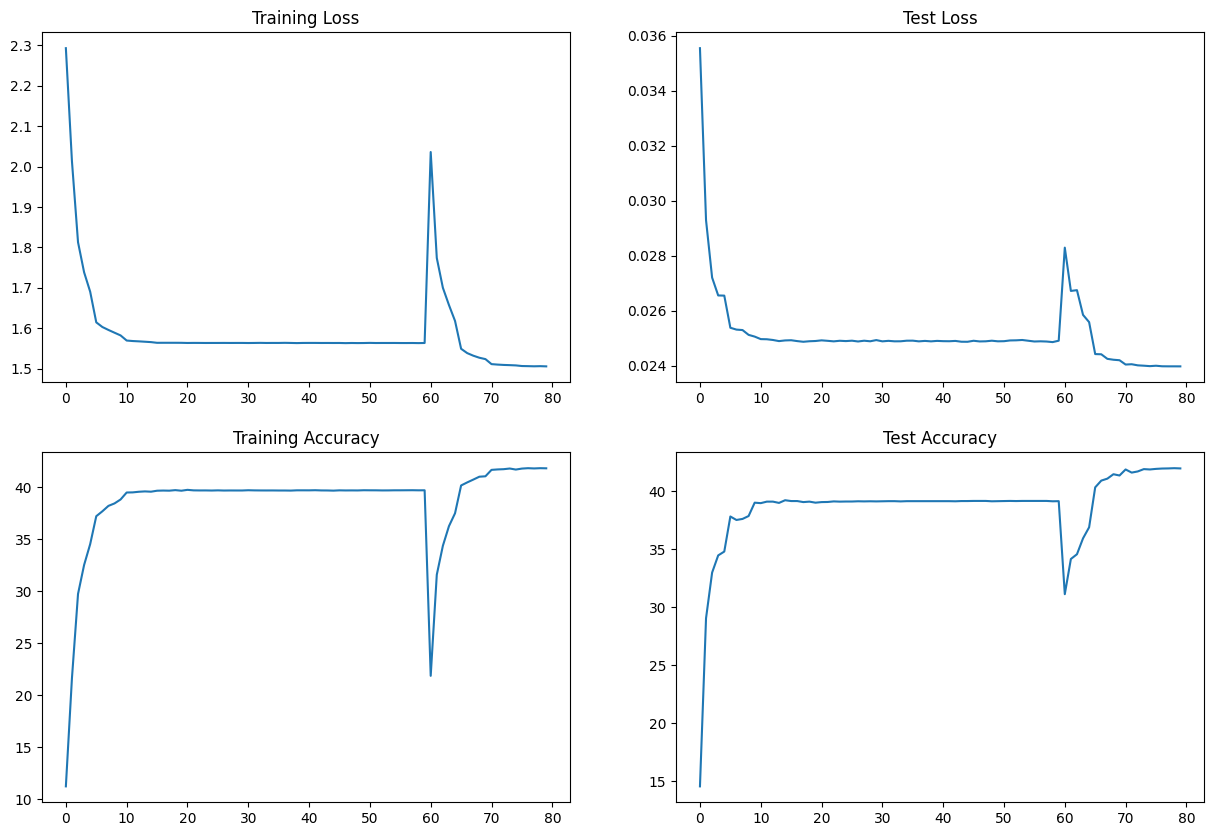

In [19]:
plot_acc_loss()

In [22]:
optimizer_adam = optim.Adam(model.parameters(), lr=1e-4,weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer_adam, step_size=5, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_adam,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




Epoch 1


Train: Loss=1.9772 Batch_id=781 Accuracy=41.75: 100%|██████████| 782/782 [00:30<00:00, 25.52it/s]


Test set: Average loss: 0.0239, Accuracy: 4213/10000 (42.13%)

Epoch 2


Train: Loss=1.2806 Batch_id=781 Accuracy=41.97: 100%|██████████| 782/782 [00:28<00:00, 27.49it/s]


Test set: Average loss: 0.0239, Accuracy: 4208/10000 (42.08%)

Epoch 3


Train: Loss=1.3513 Batch_id=781 Accuracy=42.28: 100%|██████████| 782/782 [00:28<00:00, 27.65it/s]


Test set: Average loss: 0.0238, Accuracy: 4249/10000 (42.49%)

Epoch 4


Train: Loss=0.9721 Batch_id=781 Accuracy=42.54: 100%|██████████| 782/782 [00:25<00:00, 30.35it/s]


Test set: Average loss: 0.0238, Accuracy: 4235/10000 (42.35%)

Epoch 5


Train: Loss=1.7160 Batch_id=781 Accuracy=42.71: 100%|██████████| 782/782 [00:25<00:00, 30.60it/s]


Test set: Average loss: 0.0237, Accuracy: 4256/10000 (42.56%)

Epoch 6


Train: Loss=1.7949 Batch_id=781 Accuracy=43.10: 100%|██████████| 782/782 [00:29<00:00, 26.11it/s]


Test set: Average loss: 0.0237, Accuracy: 4259/10000 (42.59%)

Epoch 7


Train: Loss=1.3049 Batch_id=781 Accuracy=43.21: 100%|██████████| 782/782 [00:32<00:00, 23.99it/s]


Test set: Average loss: 0.0237, Accuracy: 4266/10000 (42.66%)

Epoch 8


Train: Loss=1.5215 Batch_id=781 Accuracy=43.22: 100%|██████████| 782/782 [00:33<00:00, 23.67it/s]


Test set: Average loss: 0.0237, Accuracy: 4254/10000 (42.54%)

Epoch 9


Train: Loss=1.3918 Batch_id=781 Accuracy=43.24: 100%|██████████| 782/782 [00:29<00:00, 26.85it/s]


Test set: Average loss: 0.0237, Accuracy: 4272/10000 (42.72%)

Epoch 10


Train: Loss=1.3109 Batch_id=781 Accuracy=43.21: 100%|██████████| 782/782 [00:22<00:00, 34.12it/s]


Test set: Average loss: 0.0237, Accuracy: 4270/10000 (42.70%)

Epoch 11


Train: Loss=1.5080 Batch_id=781 Accuracy=43.37: 100%|██████████| 782/782 [00:26<00:00, 29.12it/s]


Test set: Average loss: 0.0237, Accuracy: 4267/10000 (42.67%)

Epoch 12


Train: Loss=1.2003 Batch_id=781 Accuracy=43.29: 100%|██████████| 782/782 [00:34<00:00, 22.90it/s]


Test set: Average loss: 0.0237, Accuracy: 4262/10000 (42.62%)

Epoch 13


Train: Loss=1.2432 Batch_id=781 Accuracy=43.38: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s]


Test set: Average loss: 0.0237, Accuracy: 4260/10000 (42.60%)

Epoch 14


Train: Loss=1.5470 Batch_id=781 Accuracy=43.33: 100%|██████████| 782/782 [00:22<00:00, 35.53it/s]


Test set: Average loss: 0.0237, Accuracy: 4256/10000 (42.56%)

Epoch 15


Train: Loss=1.8688 Batch_id=781 Accuracy=43.35: 100%|██████████| 782/782 [00:26<00:00, 29.74it/s]


Test set: Average loss: 0.0237, Accuracy: 4259/10000 (42.59%)

Epoch 16


Train: Loss=1.4480 Batch_id=781 Accuracy=43.34: 100%|██████████| 782/782 [00:33<00:00, 23.35it/s]


Test set: Average loss: 0.0237, Accuracy: 4260/10000 (42.60%)

Epoch 17


Train: Loss=1.6969 Batch_id=781 Accuracy=43.35: 100%|██████████| 782/782 [00:27<00:00, 28.31it/s]


Test set: Average loss: 0.0237, Accuracy: 4259/10000 (42.59%)

Epoch 18


Train: Loss=1.2439 Batch_id=781 Accuracy=43.34: 100%|██████████| 782/782 [00:25<00:00, 30.84it/s]


Test set: Average loss: 0.0237, Accuracy: 4260/10000 (42.60%)

Epoch 19


Train: Loss=1.5450 Batch_id=781 Accuracy=43.35: 100%|██████████| 782/782 [00:32<00:00, 23.98it/s]


Test set: Average loss: 0.0237, Accuracy: 4260/10000 (42.60%)

Epoch 20


Train: Loss=1.4253 Batch_id=781 Accuracy=43.34: 100%|██████████| 782/782 [00:32<00:00, 23.74it/s]


Test set: Average loss: 0.0237, Accuracy: 4260/10000 (42.60%)



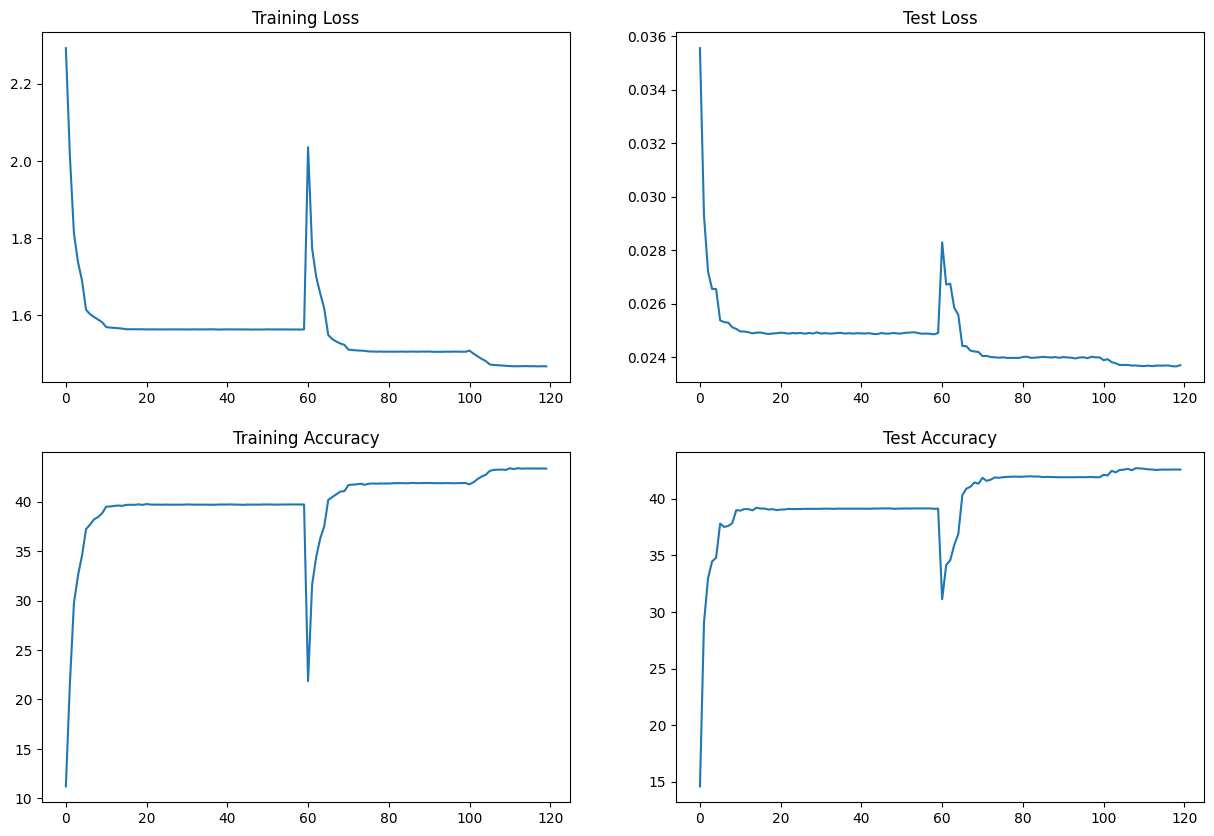

In [23]:
plot_acc_loss()